In [3]:
# pip install citipy

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# weather_api_key

In [6]:
## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create empty lists to store values

cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []
city_number= 0
city_set=0

# Create a for loop
for city in cities:
    if city_number%50==0:
        city_set+=1
        city_number=0
    city_number+=1
        

    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
    query_url = url + "appid=" + weather_api_key + "&q=" + city

    response = requests.get(query_url)
    response_json = response.json()
    print(f"Processing Record {city_number} of Set {city_set} | {city}")
    

# Try to grab the values for the empty lists

    try:     
       
        cloudiness.append(response_json["clouds"]["all"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        max_temp.append(response_json["main"]['temp_max'])
        humidity.append(response_json["main"]['humidity'])
        lat.append(response_json["coord"]["lat"])  
        lng.append(response_json["coord"]["lon"])
        wind_speed.append(response_json["wind"]["speed"])
        city_name.append(response_json["name"])
        
       
            
      
        
# Handle exceptions for a character that is not available
    except Exception as e:
        
        print(f"Not found: {city}",e)
        

        
   


Processing Record 1 of Set 1 | taolanaro
Not found: taolanaro 'clouds'
Processing Record 2 of Set 1 | vila franca do campo
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | barbosa ferraz
Processing Record 5 of Set 1 | umzimvubu
Not found: umzimvubu 'clouds'
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | wajima
Processing Record 9 of Set 1 | zhigansk
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | myingyan
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | touros
Processing Record 14 of Set 1 | fortuna
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | paradwip
Not found: paradwip 'clouds'
Processing Record 17 of Set 1 | peto
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | the valley
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | saskyla

Processing Record 37 of Set 4 | kastamonu
Processing Record 38 of Set 4 | lugoba
Processing Record 39 of Set 4 | hilo
Processing Record 40 of Set 4 | sambava
Processing Record 41 of Set 4 | keuruu
Processing Record 42 of Set 4 | jutai
Processing Record 43 of Set 4 | henties bay
Processing Record 44 of Set 4 | kieta
Processing Record 45 of Set 4 | tual
Processing Record 46 of Set 4 | longlac
Not found: longlac 'clouds'
Processing Record 47 of Set 4 | katete
Processing Record 48 of Set 4 | yerbogachen
Processing Record 49 of Set 4 | khorixas
Processing Record 50 of Set 4 | meulaboh
Processing Record 1 of Set 5 | kokoda
Processing Record 2 of Set 5 | berbera
Processing Record 3 of Set 5 | bredasdorp
Processing Record 4 of Set 5 | chuy
Processing Record 5 of Set 5 | hohhot
Processing Record 6 of Set 5 | bollnas
Processing Record 7 of Set 5 | nanortalik
Processing Record 8 of Set 5 | cortes
Processing Record 9 of Set 5 | savannakhet
Processing Record 10 of Set 5 | hithadhoo
Processing Recor

Processing Record 27 of Set 8 | bethanien
Processing Record 28 of Set 8 | bilibino
Processing Record 29 of Set 8 | palabuhanratu
Not found: palabuhanratu 'clouds'
Processing Record 30 of Set 8 | novochernorechenskiy
Processing Record 31 of Set 8 | ballina
Processing Record 32 of Set 8 | okha
Processing Record 33 of Set 8 | cayenne
Processing Record 34 of Set 8 | korcula
Processing Record 35 of Set 8 | dombarovskiy
Processing Record 36 of Set 8 | cangzhou
Processing Record 37 of Set 8 | bahawalpur
Processing Record 38 of Set 8 | longyearbyen
Processing Record 39 of Set 8 | kvitok
Processing Record 40 of Set 8 | mae sai
Processing Record 41 of Set 8 | coquimbo
Processing Record 42 of Set 8 | haibowan
Not found: haibowan 'clouds'
Processing Record 43 of Set 8 | dharmadam
Processing Record 44 of Set 8 | bodden town
Processing Record 45 of Set 8 | mut
Processing Record 46 of Set 8 | lisakovsk
Processing Record 47 of Set 8 | vao
Processing Record 48 of Set 8 | fare
Processing Record 49 of Se

Processing Record 10 of Set 12 | ayolas
Processing Record 11 of Set 12 | port augusta
Processing Record 12 of Set 12 | mareeba
Processing Record 13 of Set 12 | korla
Processing Record 14 of Set 12 | nakusp
Processing Record 15 of Set 12 | codrington
Processing Record 16 of Set 12 | niteroi
Processing Record 17 of Set 12 | nalut
Processing Record 18 of Set 12 | gizo
Processing Record 19 of Set 12 | torit
Processing Record 20 of Set 12 | vila
Processing Record 21 of Set 12 | choucheng
Not found: choucheng 'clouds'
Processing Record 22 of Set 12 | katobu
Processing Record 23 of Set 12 | tyret pervaya
Processing Record 25 of Set 12 | bowmore
Processing Record 26 of Set 12 | matara
Processing Record 27 of Set 12 | ust-kamchatsk
Not found: ust-kamchatsk 'clouds'
Processing Record 28 of Set 12 | huilong
Processing Record 29 of Set 12 | realeza
Processing Record 30 of Set 12 | erenhot
Processing Record 31 of Set 12 | ayan
Processing Record 32 of Set 12 | bobcaygeon
Processing Record 33 of Set 

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#create a dataframe
my_dict={"City":city_name,
        "Lat":lat,
        "Lng":lng,
        "Max Temp":max_temp,
        "Humidity":humidity,
        "Cloudiness":cloudiness,
        "Wind Speed":wind_speed,
        "Country":country,
        "Date":date}

df= pd.DataFrame(my_dict)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vila Franca do Campo,37.7167,-25.4333,61.21,77,1,6.69,PT,1668217687
1,Ushuaia,-54.8000,-68.3000,44.26,65,20,17.27,AR,1668217687
2,Barbosa Ferraz,-24.0300,-52.0117,61.23,94,13,4.09,BR,1668217688
3,Cape Town,-33.9258,18.4232,62.10,81,75,11.50,ZA,1668217500
4,Saint-Philippe,-21.3585,55.7679,71.19,76,7,6.15,RE,1668217688


In [10]:
#  Get the indices of cities that have humidity over 100%.
df['Humidity'].max()


100

In [11]:
# there are no temperatures over 100%

In [12]:
# df_humidity = df[(df["Humidity"] > 100)].index


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [14]:
# Export the filtered city data into a csv
# city_data.to_csv("./output_data/clean_city_data.csv", index_label="City_ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

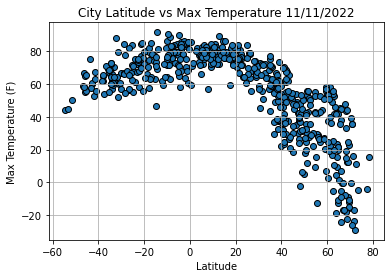

In [15]:
date = pd.Timestamp("today").strftime("%m/%d/%Y")

latitude = df["Lat"]
temperature = df["Max Temp"]
plt.scatter(latitude,temperature,edgecolor="black", linewidth=1, marker="o",)
plt.title(f"City Latitude vs Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

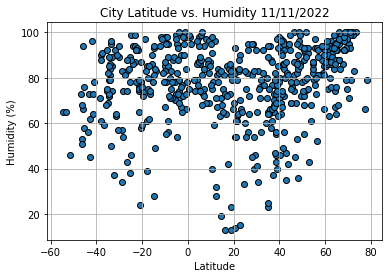

In [16]:

latitude = df["Lat"]
humidity = df["Humidity"]
plt.scatter(latitude,humidity,edgecolor="black", linewidth=1, marker="o")
plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

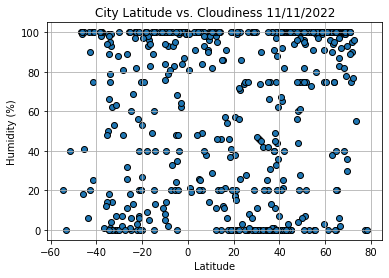

In [17]:
latitude = df["Lat"]
cloudiness = df["Cloudiness"]
plt.scatter(latitude,cloudiness,edgecolor="black", linewidth=1, marker="o")
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

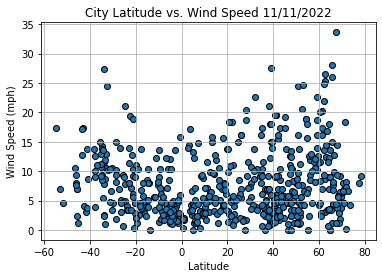

In [18]:
latitude = df["Lat"]
wind = df["Wind Speed"]
plt.scatter(latitude,wind,edgecolor="black", linewidth=1, marker="o")
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Latitude vs Wind Speed (mph).png")

## Linear Regression

In [19]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = df.loc[df["Lat"] > 0]
southern_hemisphere = df.loc[df["Lat"] < 0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8207267483008921


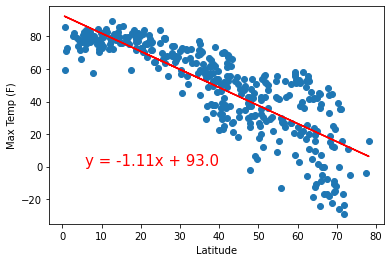

In [20]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.601475245278501


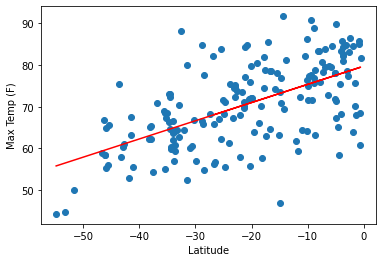

In [21]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2901814516598382


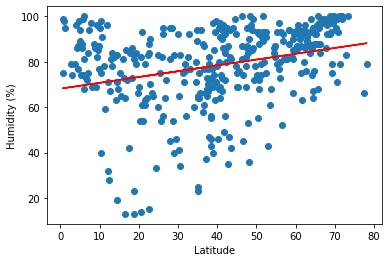

In [22]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.23438611730900086


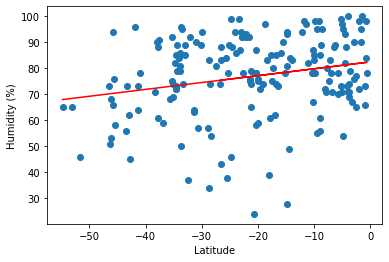

In [23]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,0.15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.22005097157023992


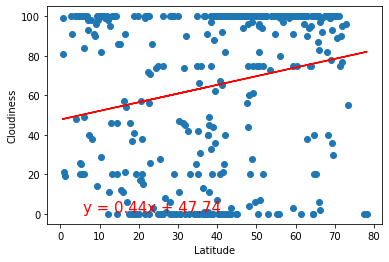

In [24]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19849380299198494


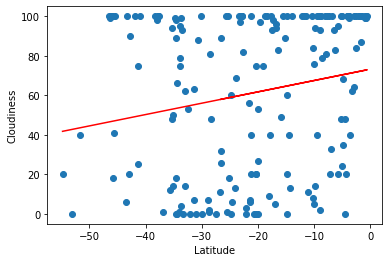

In [25]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.19122256622972394


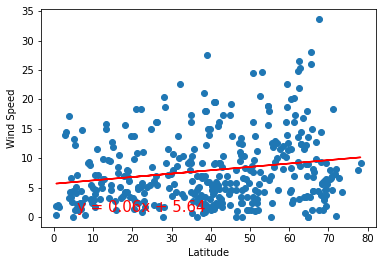

In [26]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3716181126202121


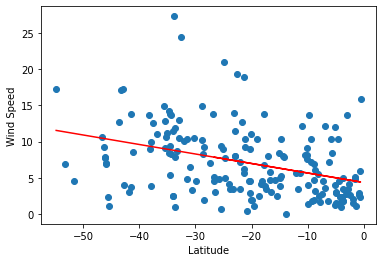

In [27]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.show()